<a href="https://colab.research.google.com/github/Ansalnakhan/projectansalna/blob/main/ansalnaSOHandRUL18final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [78]:
import pandas as pd

In [79]:
data=pd.read_csv("/content/B0018.csv")
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...,...,...,...
50280,50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312
50281,50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062
50282,50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828
50283,50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.000,2810.640


In [80]:
data=data.drop_duplicates(subset=['cycle'], keep='last')
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
196,196,1,24,2008-04-02 15:25:41,1.856487,3.277170,-0.006528,34.230853,-0.0006,0.0,3690.234
392,392,2,24,2008-04-02 19:43:48,1.846327,3.300245,-0.000448,34.392137,-0.0006,0.0,3672.344
587,587,3,24,2008-04-03 00:01:06,1.835349,3.327451,0.001026,34.232779,-0.0006,0.0,3651.641
781,781,4,24,2008-04-03 04:16:37,1.835263,3.314182,-0.002234,34.413450,-0.0006,0.0,3631.563
975,975,5,24,2008-04-03 08:33:25,1.834646,3.305497,0.000009,34.345885,-0.0006,0.0,3629.172
...,...,...,...,...,...,...,...,...,...,...,...
49092,49092,164,24,2008-05-26 10:44:38,1.293464,3.615561,-0.002548,34.075649,0.0006,0.0,2793.390
49389,49389,165,24,2008-05-26 15:30:43,1.288003,3.621191,-0.002460,33.991350,0.0006,0.0,2793.390
49686,49686,166,24,2008-05-26 20:21:04,1.287453,3.619185,0.000478,34.059198,0.0006,0.0,2792.485
49984,49984,167,24,2008-05-27 15:52:41,1.309015,3.595365,-0.002342,34.556514,0.0006,0.0,2802.016


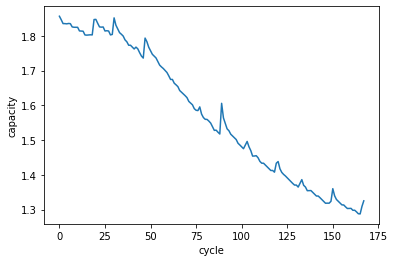

In [81]:
import matplotlib.pyplot as plt
plt.plot(range(len(data["capacity"])),data["capacity"])
plt.ylabel('capacity')
plt.xlabel('cycle')
plt.show()

In [82]:
capacity=data[["capacity"]]
capacity=capacity.set_index(pd.Index(range(len(capacity))))
capacity

,capacity
0,1.856487
1,1.846327
2,1.835349
3,1.835263
4,1.834646
...,...
163,1.293464
164,1.288003
165,1.287453
166,1.309015


In [83]:
soh=[]
for i in range(len(capacity)):
  soh.append(capacity.loc[i].at["capacity"]/capacity.loc[0].at["capacity"])

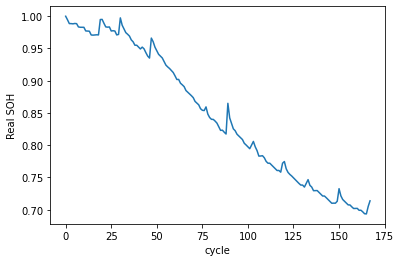

In [84]:
plt.plot(range(len(soh)),soh)
plt.ylabel('Real SOH')
plt.xlabel('cycle')
plt.show()

In [85]:
capacity=np.asarray(capacity)

In [86]:
type(capacity)

numpy.ndarray

In [87]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(soh[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]  

In [88]:
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [89]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 0.4252
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0985
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0229
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0174
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0136
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0017


In [90]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [91]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,r2_score

In [92]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 7ms/step


0.00013636449252029715

In [93]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.012


In [94]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.01101571]
R2_score:  0.8188132171760913


Text(0.5, 0, 'cycle')

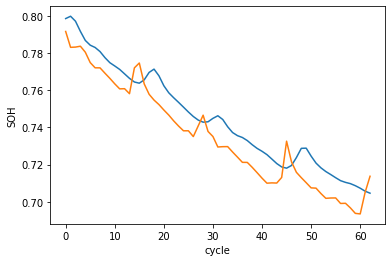

In [95]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)
plt.ylabel('SOH')
plt.xlabel('cycle')

In [96]:
preds = model.predict(X)

6/6 [==============================] - 0s 3ms/step


In [97]:
preds

array([[0.9715393 ],
       [0.9696562 ],
       [0.9692659 ],
       [0.96904916],
       [0.96805567],
       [0.9661815 ],
       [0.96468484],
       [0.96392465],
       [0.96276104],
       [0.9607826 ],
       [0.9589416 ],
       [0.95732665],
       [0.9552345 ],
       [0.9537169 ],
       [0.9534267 ],
       [0.9547682 ],
       [0.9594721 ],
       [0.96732867],
       [0.97196364],
       [0.9702664 ],
       [0.96677274],
       [0.96459043],
       [0.9630497 ],
       [0.96102107],
       [0.95919716],
       [0.9576298 ],
       [0.9569504 ],
       [0.96007746],
       [0.96615994],
       [0.9674071 ],
       [0.96283424],
       [0.95807964],
       [0.9545585 ],
       [0.9513014 ],
       [0.94756246],
       [0.94384   ],
       [0.94076526],
       [0.93853575],
       [0.9368255 ],
       [0.93551767],
       [0.9347393 ],
       [0.93294215],
       [0.9292228 ],
       [0.92674536],
       [0.9297527 ],
       [0.9377032 ],
       [0.9415005 ],
       [0.937

Text(0.5, 0, 'cycle')

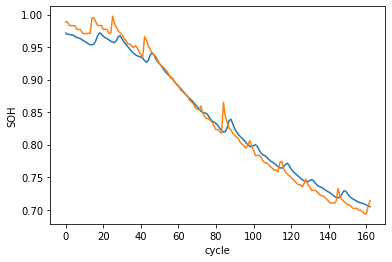

In [98]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)
plt.ylabel('SOH')
plt.xlabel('cycle')

Predicting Capacity

In [99]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(capacity[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k] 

In [100]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 6ms/step - loss: 2.0731
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.2263
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1126
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 0.1873
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0203
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0642
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0115
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0275
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0080


In [101]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [102]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 6ms/step


0.0002772281189913127

In [103]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.017


In [104]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.01152231]
R2_score:  0.8931244236989517


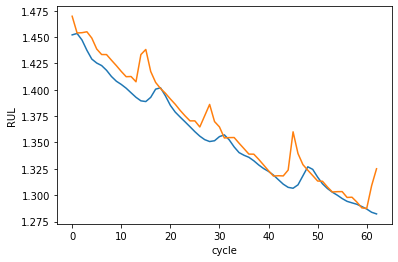

In [105]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)
plt.ylabel('RUL')
plt.xlabel('cycle')
plt.show()


In [106]:
preds = model.predict(X)

6/6 [==============================] - 0s 3ms/step


In [107]:
preds

array([[1.7611932],
       [1.7584312],
       [1.7578391],
       [1.7573699],
       [1.7552465],
       [1.7517096],
       [1.7494678],
       [1.7481012],
       [1.7457187],
       [1.7419746],
       [1.7390342],
       [1.7359164],
       [1.7319875],
       [1.7298106],
       [1.7294239],
       [1.7323539],
       [1.7420629],
       [1.7567905],
       [1.7624786],
       [1.7585553],
       [1.7526437],
       [1.7491944],
       [1.7462279],
       [1.7423843],
       [1.7395284],
       [1.7364502],
       [1.7356966],
       [1.7430289],
       [1.7540252],
       [1.7530911],
       [1.7449902],
       [1.7367824],
       [1.7307085],
       [1.7247066],
       [1.7178249],
       [1.711342 ],
       [1.7059554],
       [1.7022681],
       [1.6990944],
       [1.6970019],
       [1.6957341],
       [1.6917702],
       [1.6847483],
       [1.6812491],
       [1.6886852],
       [1.7037902],
       [1.7070392],
       [1.6994897],
       [1.6897335],
       [1.6819317],


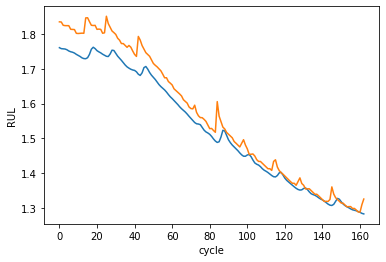

In [108]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)
plt.ylabel('RUL')
plt.xlabel('cycle')
plt.show()